In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from PIL import Image

In [2]:
train_directory="C:/Users/Roshini/Documents/Project/chest_xray/chest_xray/train/"
val_directory="C:/Users/Roshini/Documents/Project/chest_xray/chest_xray/val"
test_directory="C:/Users/Roshini/Documents/Project/chest_xray/chest_xray/test/"

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [4]:
Image_gen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [5]:
train = Image_gen.flow_from_directory(train_directory,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

validation = Image_gen.flow_from_directory(val_directory,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

test = val_Datagen.flow_from_directory(test_directory,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)

In [7]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          patience=8)

In [8]:
def create_model():
    resnet_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top = False,
        input_shape = (224,224,3)
    )

    for layer in resnet_model.layers:
        layer.trainable=False

    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    # output layer
    predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

    res_model = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

    # Compiling the model
    res_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return res_model

In [9]:
res_model = create_model()

In [10]:
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [12]:
history = res_model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    batch_size=32)

Epoch 1/30
100/100 [==============================] - 318s 3s/step - loss: 0.2915 - accuracy: 0.8666 - val_loss: 0.8825 - val_accuracy: 0.6250
Epoch 2/30
100/100 [==============================] - 211s 2s/step - loss: 0.2065 - accuracy: 0.9159 - val_loss: 0.5200 - val_accuracy: 0.8125
Epoch 3/30
100/100 [==============================] - 193s 2s/step - loss: 0.1920 - accuracy: 0.9153 - val_loss: 0.7102 - val_accuracy: 0.6875
Epoch 4/30
100/100 [==============================] - 187s 2s/step - loss: 0.1775 - accuracy: 0.9237 - val_loss: 1.3427 - val_accuracy: 0.6250
Epoch 5/30
100/100 [==============================] - 187s 2s/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3347 - val_accuracy: 0.8125
Epoch 6/30
100/100 [==============================] - 195s 2s/step - loss: 0.1739 - accuracy: 0.9300 - val_loss: 0.6674 - val_accuracy: 0.6875
Epoch 7/30
100/100 [==============================] - 196s 2s/step - loss: 0.1661 - accuracy: 0.9366 - val_loss: 0.3817 - val_accuracy: 0.9375

Text(0, 0.5, 'Loss')

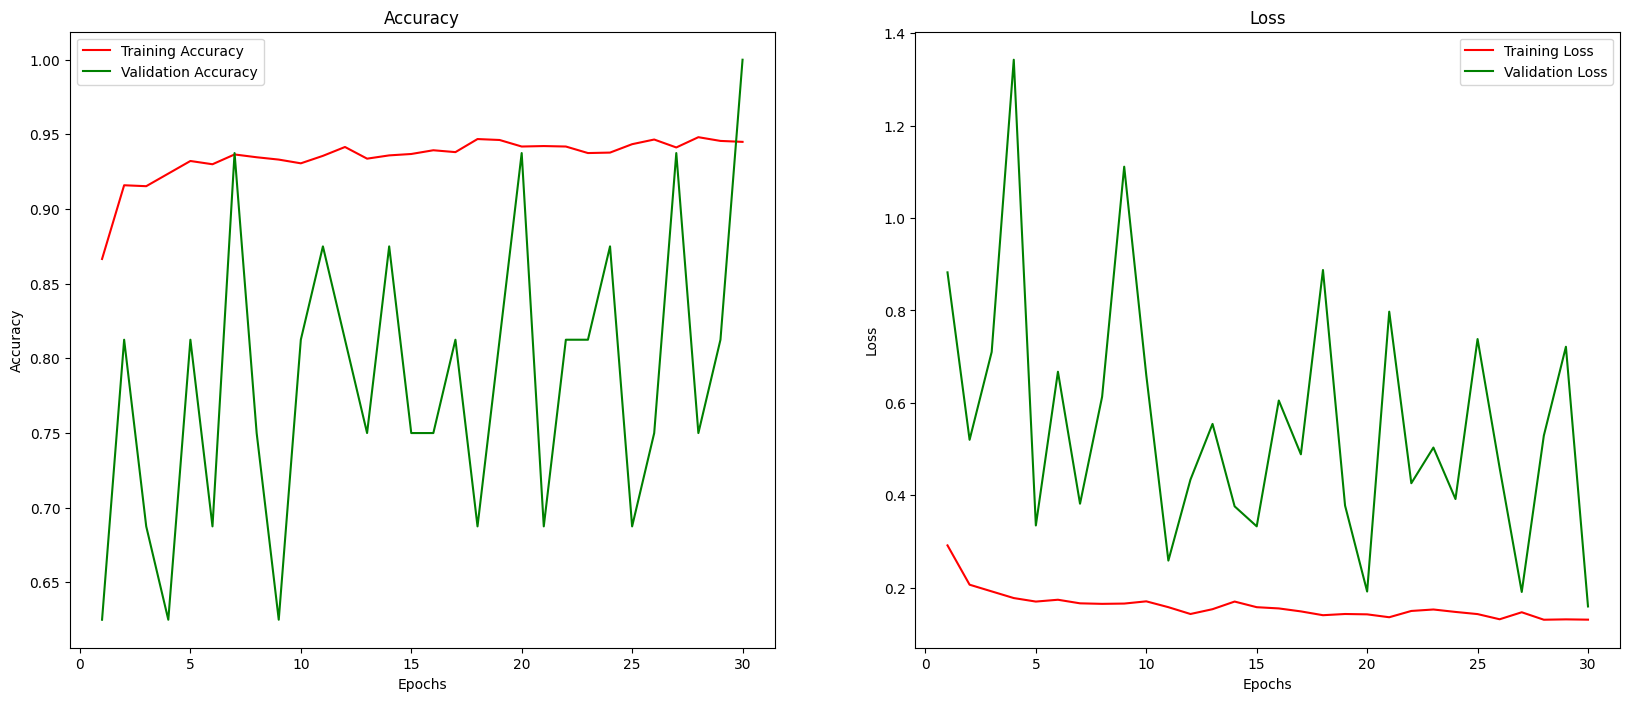

In [13]:
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'r' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'g' , label = 'Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'r' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'g' , label = 'Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [4]:
import keras
import numpy as np
from PIL import Image

model = keras.models.load_model('models/resnet92_model.h5')

from tensorflow.keras.preprocessing import image

image_path = 'C:/Users/Roshini/Documents/Project/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)


print(predictions)
if predictions[0] < 5.748876e-15:
    print("The image is NORMAL.")
else:
    print("The image indicates PNEUMONIA.")

1/1 [==============================] - 3s 3s/step
[[3.5841371e-19]]
The image is NORMAL.


In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the trained model

# Define image dimensions
img_width, img_height = 224, 224

# Define test data directory
test_data_dir = 'C:/Users/Roshini/Documents/Project/chest_xray/chest_xray/test/'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
predictions = res_model.predict_generator(test_generator)

# Convert predictions to binary labels
predicted_labels = np.round(predictions)

# Get true labels from the generator
true_labels = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)


# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Found 624 images belonging to 2 classes.
Confusion Matrix:
[[213  21]
 [ 28 362]]
Accuracy: 0.9214743589743589
Precision: 0.9451697127937336
Recall: 0.9282051282051282


In [37]:
res_model.save('models/resnet92_model.h5')